In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc

data = pd.read_csv("concrete_data.csv")
data.columns = data.columns.str.strip()

In [2]:
target = 'concrete_compressive_strength'

data['strength_class'] = pd.cut(
    data[target],
    bins=[0, 30, 50, 100],
    labels=['Low', 'Medium', 'High']
)

print("Количество объектов по классам:")
print(data['strength_class'].value_counts())

print("\nРаспределение классов:")
print(data['strength_class'].value_counts(normalize=True).round(3))


Количество объектов по классам:
strength_class
Medium    422
Low       398
High      210
Name: count, dtype: int64

Распределение классов:
strength_class
Medium    0.410
Low       0.386
High      0.204
Name: proportion, dtype: float64


Классы распределены относительно равномерно.    
Следовательно, дополнительная балансировка данных не требуется.


In [3]:
features = [
    'cement', 'blast_furnace_slag', 'fly_ash', 'water',
    'superplasticizer', 'coarse_aggregate',
    'fine_aggregate', 'age'
]

X = data[features]
y = data['strength_class']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)


In [4]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Размеры выборок:")
print(f"Train: {X_train.shape[0]}")
print(f"Validation: {X_val.shape[0]}")
print(f"Test: {X_test.shape[0]}")


Размеры выборок:
Train: 618
Validation: 206
Test: 206


k= 1: Train Acc=0.998, Val Acc=0.714
k= 2: Train Acc=0.869, Val Acc=0.670
k= 3: Train Acc=0.866, Val Acc=0.714
k= 4: Train Acc=0.809, Val Acc=0.718
k= 5: Train Acc=0.794, Val Acc=0.709
k= 6: Train Acc=0.793, Val Acc=0.680
k= 7: Train Acc=0.778, Val Acc=0.699
k= 8: Train Acc=0.772, Val Acc=0.704
k= 9: Train Acc=0.764, Val Acc=0.689
k=10: Train Acc=0.764, Val Acc=0.684
k=11: Train Acc=0.746, Val Acc=0.675
k=12: Train Acc=0.743, Val Acc=0.699
k=13: Train Acc=0.741, Val Acc=0.704
k=14: Train Acc=0.748, Val Acc=0.699


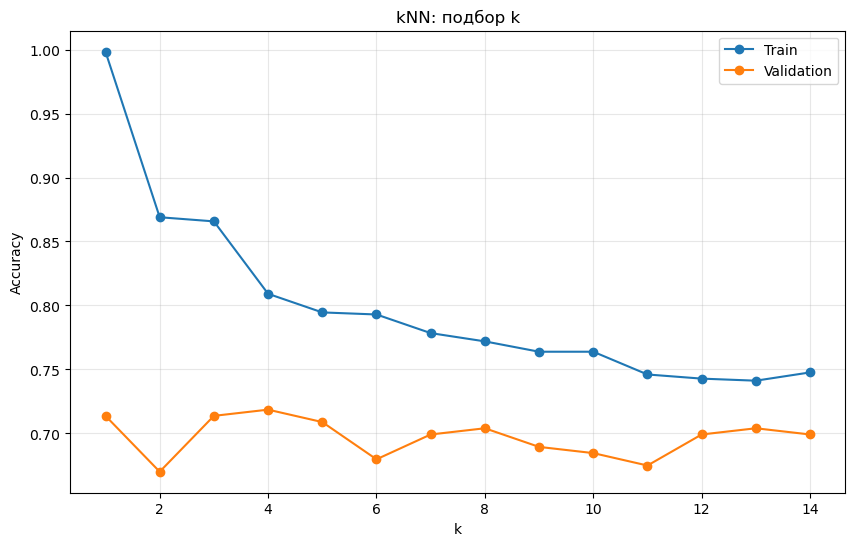

Оптимальное k: 4


In [5]:
k_range = range(1, 15)
train_scores, val_scores = [], []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    train_scores.append(knn.score(X_train_scaled, y_train))
    val_scores.append(knn.score(X_val_scaled, y_val))
    
    print(f"k={k:2d}: Train Acc={train_scores[-1]:.3f}, Val Acc={val_scores[-1]:.3f}")

plt.figure(figsize=(10, 6))
plt.plot(k_range, train_scores, marker='o', label='Train')
plt.plot(k_range, val_scores, marker='o', label='Validation')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("kNN: подбор k")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

optimal_k = k_range[np.argmax(val_scores)]
print(f"Оптимальное k: {optimal_k}")


In [6]:
X_final_knn = np.vstack([X_train_scaled, X_val_scaled])
y_final_knn = np.concatenate([y_train, y_val])

knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_final_knn, y_final_knn)

y_pred_knn = knn_final.predict(X_test_scaled)
y_proba_knn = knn_final.predict_proba(X_test_scaled)

print("kNN метрики:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1:", f1_score(y_test, y_pred_knn, average='weighted'))

print("\nОтчёт классификации:")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))


kNN метрики:
Accuracy: 0.7281553398058253
Precision: 0.7299448707680426
Recall: 0.7281553398058253
F1: 0.7197008020655213

Отчёт классификации:
              precision    recall  f1-score   support

        High       0.70      0.79      0.74        42
         Low       0.73      0.89      0.80        80
      Medium       0.74      0.55      0.63        84

    accuracy                           0.73       206
   macro avg       0.73      0.74      0.72       206
weighted avg       0.73      0.73      0.72       206



Depth= 1: Train Acc=0.561, Val Acc=0.583
Depth= 2: Train Acc=0.675, Val Acc=0.621
Depth= 3: Train Acc=0.723, Val Acc=0.704
Depth= 4: Train Acc=0.780, Val Acc=0.709
Depth= 5: Train Acc=0.803, Val Acc=0.723
Depth= 6: Train Acc=0.835, Val Acc=0.733
Depth= 7: Train Acc=0.874, Val Acc=0.757
Depth= 8: Train Acc=0.917, Val Acc=0.757
Depth= 9: Train Acc=0.947, Val Acc=0.782
Depth=10: Train Acc=0.963, Val Acc=0.767
Depth=11: Train Acc=0.982, Val Acc=0.786
Depth=12: Train Acc=0.987, Val Acc=0.786
Depth=13: Train Acc=0.994, Val Acc=0.786
Depth=14: Train Acc=0.998, Val Acc=0.811


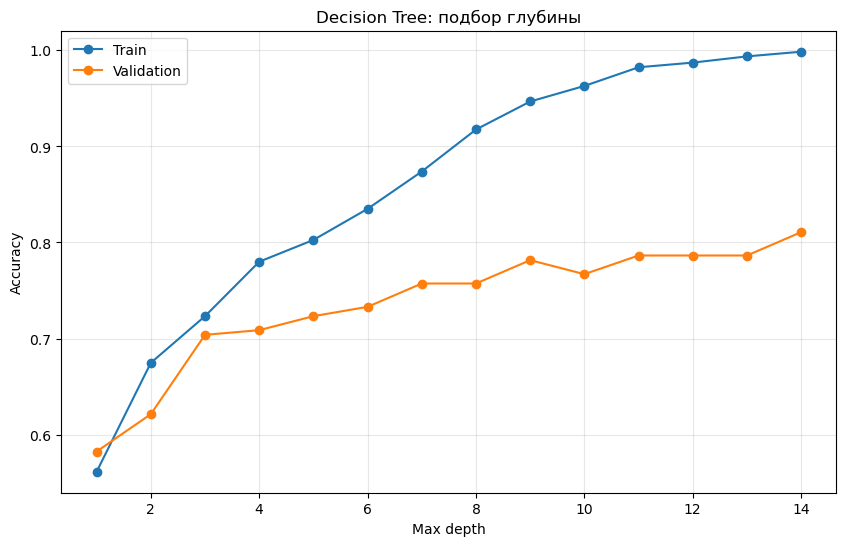

Оптимальная глубина: 14


In [7]:
depth_range = range(1, 15)
train_scores_tree, val_scores_tree = [], []

for d in depth_range:
    tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    tree.fit(X_train, y_train)
    
    train_scores_tree.append(tree.score(X_train, y_train))
    val_scores_tree.append(tree.score(X_val, y_val))
    
    print(f"Depth={d:2d}: Train Acc={train_scores_tree[-1]:.3f}, Val Acc={val_scores_tree[-1]:.3f}")

plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_scores_tree, marker='o', label='Train')
plt.plot(depth_range, val_scores_tree, marker='o', label='Validation')
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree: подбор глубины")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

optimal_depth = depth_range[np.argmax(val_scores_tree)]
print(f"Оптимальная глубина: {optimal_depth}")


In [8]:
X_final_tree = pd.concat([X_train, X_val])
y_final_tree = np.concatenate([y_train, y_val])

tree_final = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
tree_final.fit(X_final_tree, y_final_tree)

y_pred_tree = tree_final.predict(X_test)
y_proba_tree = tree_final.predict_proba(X_test)

print("Decision Tree метрики:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_tree, average='weighted'))
print("F1:", f1_score(y_test, y_pred_tree, average='weighted'))

print("\nОтчёт классификации:")
print(classification_report(y_test, y_pred_tree, target_names=le.classes_))


Decision Tree метрики:
Accuracy: 0.8349514563106796
Precision: 0.8347460407578693
Recall: 0.8349514563106796
F1: 0.8346629713804292

Отчёт классификации:
              precision    recall  f1-score   support

        High       0.88      0.86      0.87        42
         Low       0.84      0.88      0.86        80
      Medium       0.80      0.79      0.80        84

    accuracy                           0.83       206
   macro avg       0.84      0.84      0.84       206
weighted avg       0.83      0.83      0.83       206



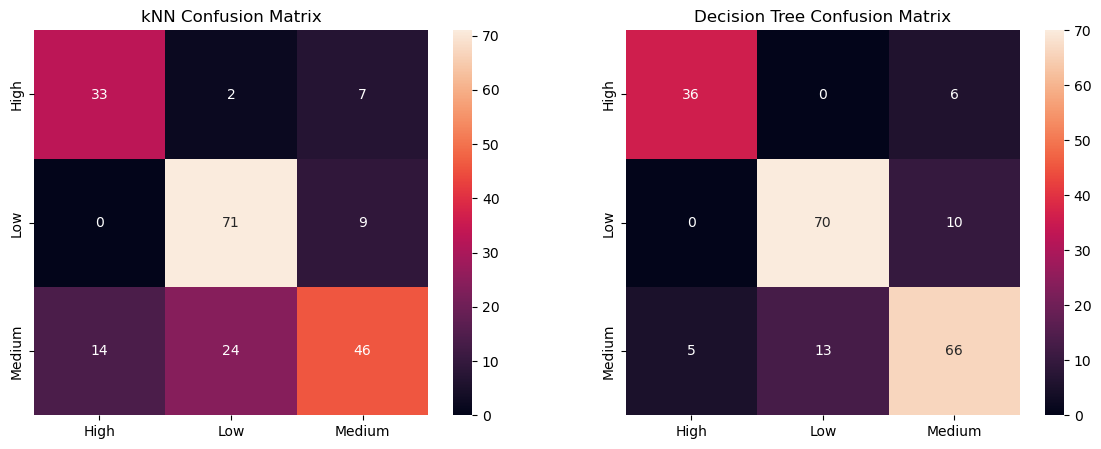

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(
    confusion_matrix(y_test, y_pred_knn),
    annot=True, fmt='d',
    xticklabels=le.classes_,
    yticklabels=le.classes_,
    ax=axes[0]
)
axes[0].set_title("kNN Confusion Matrix")

sns.heatmap(
    confusion_matrix(y_test, y_pred_tree),
    annot=True, fmt='d',
    xticklabels=le.classes_,
    yticklabels=le.classes_,
    ax=axes[1]
)
axes[1].set_title("Decision Tree Confusion Matrix")

plt.show()


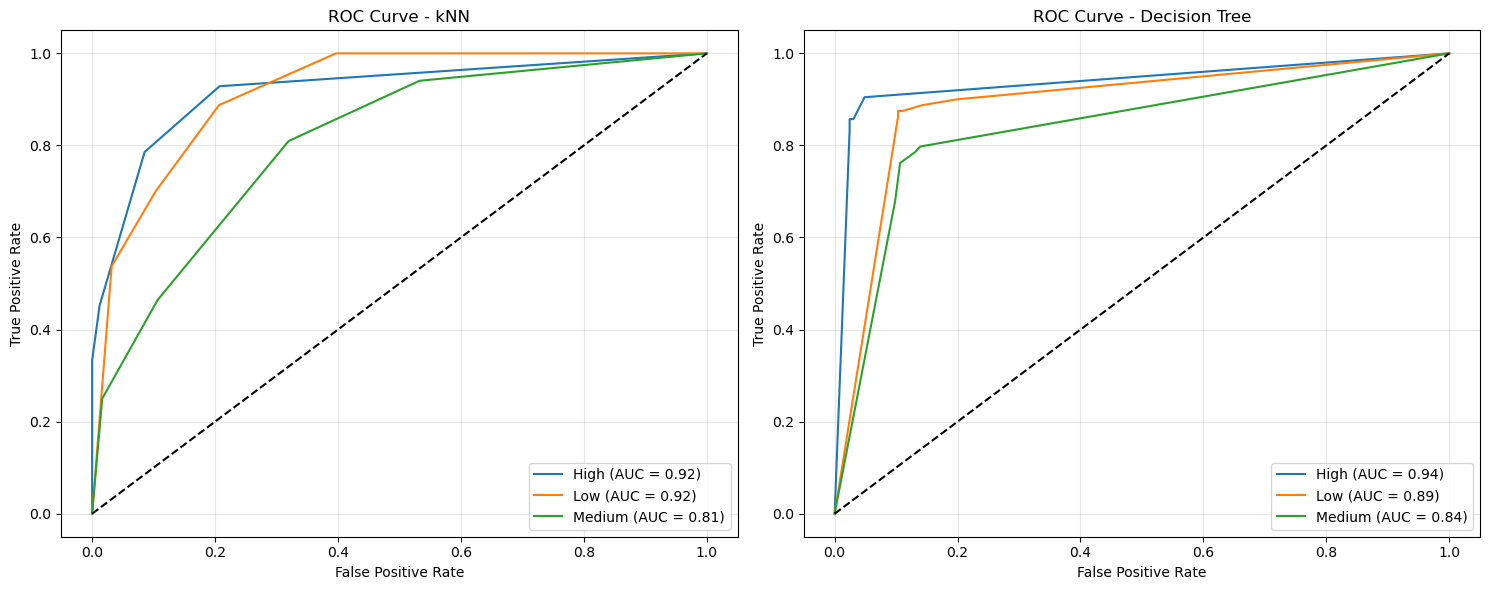

In [10]:
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(
        y_test_bin[:, i],
        y_proba_knn[:, i]
    )
    roc_auc = auc(fpr, tpr)
    
    axes[0].plot(
        fpr, tpr,
        label=f"{le.classes_[i]} (AUC = {roc_auc:.2f})"
    )

axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_title("ROC Curve - kNN")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend()
axes[0].grid(alpha=0.3)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(
        y_test_bin[:, i],
        y_proba_tree[:, i]
    )
    roc_auc = auc(fpr, tpr)
    
    axes[1].plot(
        fpr, tpr,
        label=f"{le.classes_[i]} (AUC = {roc_auc:.2f})"
    )

axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_title("ROC Curve - Decision Tree")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


Выводы

Оба алгоритма показали хорошие результаты классификации.

kNN чувствителен к масштабу признаков и выбору k  
Дерево решений показало более высокие значения Accuracy и F1-score  

Это объясняется тем, что дерево решений хорошо улавливает нелинейные зависимости
между компонентами бетона и его прочностью.

Таким образом, для данного датасета Decision Tree оказался более эффективным.
